In [1]:
import numpy as np
import theano as th
import matplotlib.pyplot as plt

In [2]:
xdata=np.asarray([1.2,2.0,3.6,5.8,9.11,8.51,12.55,18.52,45.12,65.12])
ydata=np.asarray([1,0,0,1,0,1,0,1,1,0])

In [3]:
len(ydata)

10

In [4]:
len(xdata)

10

In [5]:
#Algorithm
#y=mX+C
x=th.tensor.vector(name='x')
y=th.tensor.vector(name='y')

In [6]:
#Values of m and c
m=th.shared(np.random.randn(),name='m')
c=th.shared(np.random.randn(),name='c')
#m=0.98765556
#c=12.87557887

In [7]:
# Equation of the Algorithm
yh=np.dot(x,m)+c

In [8]:
# cost function - 1/2n sum of sq- (y-yh)
n=len(xdata)
# OR n=xdata.size
cost=th.tensor.sum((y-yh)**2)/(2*n)

In [9]:
# Gradient Descent Algorithm (formula of B0new)
djdm=th.tensor.grad(cost,m)
djdc=th.tensor.grad(cost,c)
mnew = m-0.0005*djdm
cnew = c-0.0005*djdc

In [10]:
#step 3 is to define the train and test functions

train=th.function([x,y],cost,updates=[(m,mnew),(c,cnew)])
test=th.function([x],yh)

In [11]:
#iteration 
costval=[]
for i in range(40000):
    costm=train(xdata,ydata)
    costval.append(costm)
  #  print(costm)

In [12]:
a=np.linspace(0,70,20)
b=test(a)
print(b)

[0.52805987 0.52203162 0.51600337 0.50997512 0.50394687 0.49791862
 0.49189037 0.48586212 0.47983387 0.47380562 0.46777737 0.46174911
 0.45572086 0.44969261 0.44366436 0.43763611 0.43160786 0.42557961
 0.41955136 0.41352311]


final value of m is-0.0016362394579919816
final value of c is0.5280598715850848
[0.42150796]


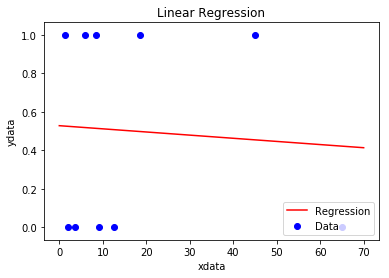

In [14]:
print('final value of m is'+str(m.get_value()))
print('final value of c is'+str(c.get_value()))
print(test([65.12]))
plt.scatter(xdata,ydata,color='b',label='Data')
plt.plot(a,b,color='red',label='Regression')
plt.title("Linear Regression")
plt.xlabel("xdata")
plt.ylabel("ydata")
plt.legend(loc=4)
plt.show()